In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Importing the data

df = pd.read_csv('2019_nCoV_data.csv')

In [3]:
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [4]:
df['Country'].unique()

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK', 'Belgium',
       'Others', 'Egypt'], dtype=object)

In [5]:
df['Country'].value_counts()

Mainland China          801
US                      188
Australia                84
Canada                   59
China                    34
South Korea              27
Thailand                 27
Japan                    27
Taiwan                   26
Hong Kong                26
Vietnam                  26
Macau                    26
Singapore                26
Malaysia                 25
France                   25
Nepal                    24
Cambodia                 22
Sri Lanka                22
Germany                  22
Finland                  20
Philippines              20
United Arab Emirates     20
Italy                    19
India                    19
Sweden                   18
Spain                    18
UK                       18
Russia                   18
Belgium                  14
Others                   11
Egypt                     4
Brazil                    1
Ivory Coast               1
Mexico                    1
Name: Country, dtype: int64

In [6]:
#Describing the data

df.describe()

,Sno,Confirmed,Deaths,Recovered
count,1719.000000,1719.000000,1719.000000,1719.000000
mean,860.000000,454.596859,10.441536,44.361838
std,496.376873,3712.529032,106.638286,351.078713
min,1.000000,0.000000,0.000000,0.000000
25%,430.500000,2.000000,0.000000,0.000000
50%,860.000000,12.000000,0.000000,0.000000
75%,1289.500000,109.000000,0.000000,7.000000
max,1719.000000,59989.000000,1789.000000,7862.000000


In [7]:
#Data Cleaning

df.isnull().sum()

Sno                 0
Date                0
Province/State    462
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [8]:
df.columns

Index(['Sno', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [9]:
df1 = df.drop(columns=['Date', 'Province/State', 'Last Update'])

In [10]:
df2 = df1['Country'].value_counts()

In [11]:
df3 = pd.DataFrame(df2).sort_index(axis=1)

In [12]:
df3.head(10)

,Country
Mainland China,801
US,188
Australia,84
Canada,59
China,34
South Korea,27
Thailand,27
Japan,27
Taiwan,26
Hong Kong,26


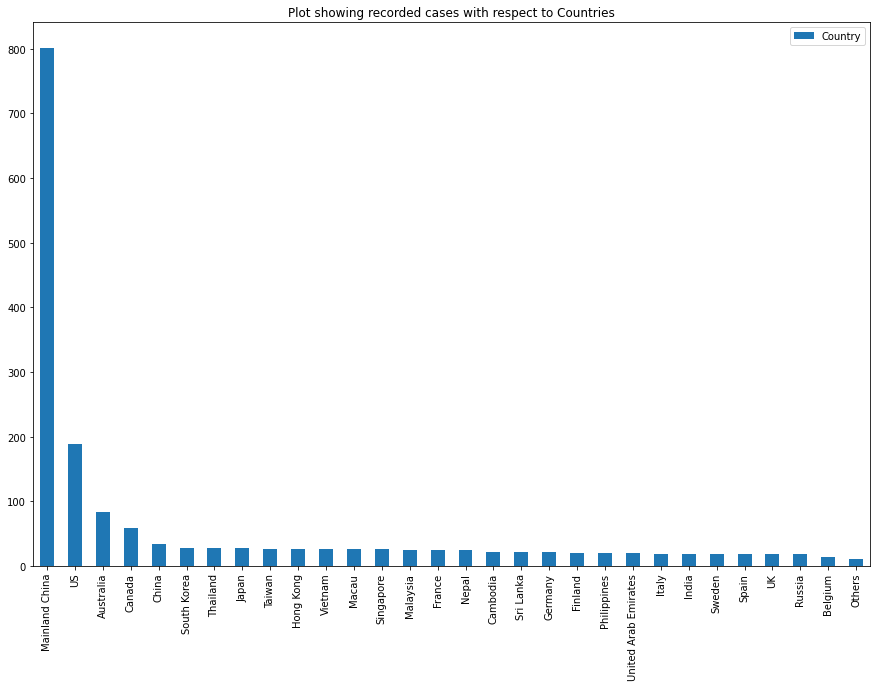

In [13]:
df3.head(30).plot(kind = 'bar', figsize = (15,10), title = 'Plot showing recorded cases with respect to Countries')

In [14]:
df4 = pd.DataFrame(df1.groupby('Country').sum())

In [15]:
df4.head()

,Sno,Confirmed,Deaths,Recovered
Country,,,,
Australia,80718,284.0,0.0,70.0
Belgium,17149,14.0,0.0,1.0
Brazil,83,0.0,0.0,0.0
Cambodia,20871,22.0,0.0,6.0
Canada,59273,116.0,0.0,6.0


In [16]:
df5 = df4.sort_values(by='Confirmed', ascending=False)

In [17]:
df5.head()

,Sno,Confirmed,Deaths,Recovered
Country,,,,
Mainland China,634068,772951.0,17908.0,75440.0
Others,14242,2161.0,0.0,0.0
Singapore,20929,797.0,0.0,122.0
Hong Kong,20834,681.0,14.0,8.0
Japan,20971,591.0,5.0,91.0


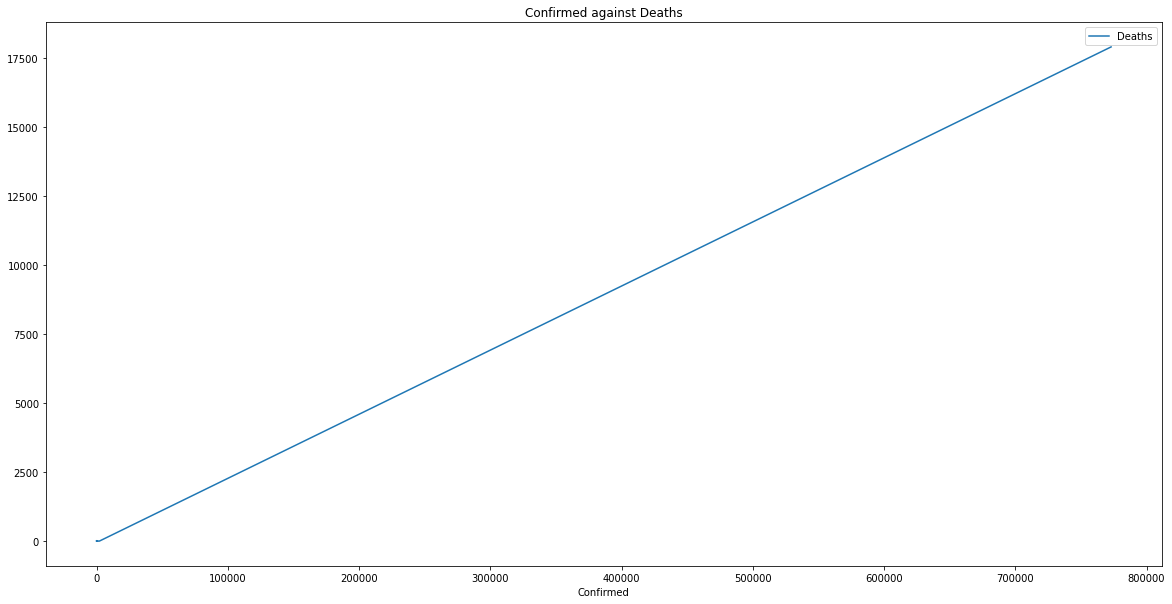

In [18]:
df5.plot('Confirmed', 'Deaths', kind ='line', title='Confirmed against Deaths', figsize = (20,10))

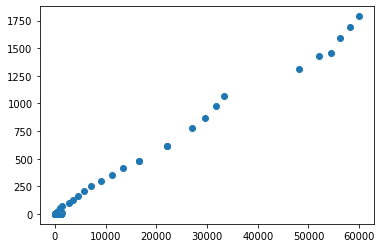

In [49]:
plt.scatter(x='Confirmed', y='Deaths', data=df)

In [20]:
#Importing the second dataset

ds = pd.read_csv('COVID19_line_list_data.csv')

In [21]:
ds

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/2020,...,01/11/2020,12/29/2019,01/04/2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,1/15/2020,NaN,01/12/2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/2020,...,1/17/2020,NaN,01/03/2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,????????,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,????????,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [22]:
#Dropping the unneccessary columns

ds1 = ds.drop(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary','location', 'symptom_onset','If_onset_approximated', 'hosp_visit_date', 'exposure_start', 'exposure_end', 'symptom', 'source', 'link'], axis=1)

In [23]:
ds1.isnull().sum()

country             0
gender            183
age               242
visiting Wuhan      0
from Wuhan          4
death               0
recovered           0
dtype: int64

In [24]:
#Filling cells without data with zero(0)

ds1['from Wuhan'] = ds1['from Wuhan'].fillna(0)

In [25]:
ds1

,country,gender,age,visiting Wuhan,from Wuhan,death,recovered
0,China,male,66.0,1,0.0,0,0
1,China,female,56.0,0,1.0,0,0
2,China,male,46.0,0,1.0,0,0
3,China,female,60.0,1,0.0,0,0
4,China,male,58.0,0,0.0,0,0
...,...,...,...,...,...,...,...
1080,Austria,NaN,24.0,0,0.0,0,0
1081,Afghanistan,NaN,35.0,0,0.0,0,0
1082,Algeria,male,NaN,0,0.0,0,0
1083,Croatia,male,NaN,0,0.0,0,0


In [26]:
ds1.isnull().sum()

country             0
gender            183
age               242
visiting Wuhan      0
from Wuhan          0
death               0
recovered           0
dtype: int64

In [27]:
#Dropping rows without data

ds2 = ds1.dropna()

In [28]:
ds2

,country,gender,age,visiting Wuhan,from Wuhan,death,recovered
0,China,male,66.0,1,0.0,0,0
1,China,female,56.0,0,1.0,0,0
2,China,male,46.0,0,1.0,0,0
3,China,female,60.0,1,0.0,0,0
4,China,male,58.0,0,0.0,0,0
...,...,...,...,...,...,...,...
1027,Spain,male,58.0,0,0.0,0,0
1029,Spain,female,27.0,0,0.0,0,0
1030,Sweden,female,25.0,1,0.0,0,0
1052,Lebanon,female,45.0,0,0.0,0,0


In [29]:
ds2.isnull().sum()

country           0
gender            0
age               0
visiting Wuhan    0
from Wuhan        0
death             0
recovered         0
dtype: int64

In [30]:
#One hot encoding the sex column

ds2['sex'] = pd.get_dummies(ds2['gender'], drop_first=True)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
ds2

,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,sex
0,China,male,66.0,1,0.0,0,0,1
1,China,female,56.0,0,1.0,0,0,0
2,China,male,46.0,0,1.0,0,0,1
3,China,female,60.0,1,0.0,0,0,0
4,China,male,58.0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...
1027,Spain,male,58.0,0,0.0,0,0,1
1029,Spain,female,27.0,0,0.0,0,0,0
1030,Sweden,female,25.0,1,0.0,0,0,0
1052,Lebanon,female,45.0,0,0.0,0,0,0


In [32]:
ds3 = ds2.drop(['gender'], axis=1)

In [33]:
ds3

,country,age,visiting Wuhan,from Wuhan,death,recovered,sex
0,China,66.0,1,0.0,0,0,1
1,China,56.0,0,1.0,0,0,0
2,China,46.0,0,1.0,0,0,1
3,China,60.0,1,0.0,0,0,0
4,China,58.0,0,0.0,0,0,1
...,...,...,...,...,...,...,...
1027,Spain,58.0,0,0.0,0,0,1
1029,Spain,27.0,0,0.0,0,0,0
1030,Sweden,25.0,1,0.0,0,0,0
1052,Lebanon,45.0,0,0.0,0,0,0


In [34]:
ds3['country'].value_counts()

China          190
Japan          185
Hong Kong       93
South Korea     92
Singapore       90
Taiwan          31
Malaysia        23
France          16
Thailand        16
Spain           15
Australia       15
Germany         14
Canada          12
Vietnam          8
UAE              7
USA              6
Phillipines      3
Cambodia         1
Finland          1
UK               1
Lebanon          1
Sweden           1
Nepal            1
Italy            1
Sri Lanka        1
Switzerland      1
Name: country, dtype: int64

In [35]:
#Encoding the Country Label

label_encoder = preprocessing.LabelEncoder()
ds3['countrylabels'] = label_encoder.fit_transform(ds3['country'], )

In [36]:
ds3

,country,age,visiting Wuhan,from Wuhan,death,recovered,sex,countrylabels
0,China,66.0,1,0.0,0,0,1,3
1,China,56.0,0,1.0,0,0,0,3
2,China,46.0,0,1.0,0,0,1,3
3,China,60.0,1,0.0,0,0,0,3
4,China,58.0,0,0.0,0,0,1,3
...,...,...,...,...,...,...,...,...
1027,Spain,58.0,0,0.0,0,0,1,16
1029,Spain,27.0,0,0.0,0,0,0,16
1030,Sweden,25.0,1,0.0,0,0,0,18
1052,Lebanon,45.0,0,0.0,0,0,0,10


In [37]:
#Importing the model

from sklearn.tree import DecisionTreeClassifier

In [38]:
#Defining the model

model = DecisionTreeClassifier(random_state=1)

In [39]:
#The Data dataframe

x = ds3.drop(['country', 'recovered', 'death'], axis = 1)

In [40]:
x.head()

,age,visiting Wuhan,from Wuhan,sex,countrylabels
0,66.0,1,0.0,1,3
1,56.0,0,1.0,0,3
2,46.0,0,1.0,1,3
3,60.0,1,0.0,0,3
4,58.0,0,0.0,1,3


In [41]:
#The result dataframe

y = ds3['death']

In [42]:
#Spliting the data between train and test data

x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.2)

In [43]:
#Training the model

model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [44]:
#Testing the model

predictions = model.predict(x_test)

In [45]:
#Checking the model accuracy

accuracyscore = accuracy_score(y_test, predictions)

In [46]:
accuracyscore

0.9575757575757575

In [47]:
#Predicting the survival rate of a victim using the following parameters [age, visiting Wuhan, from Wuhan, sex, countrylabels]

model.predict([[58,0,0,1,16],[25,0,0,1,19], [70,0,0,1,19]])

array([0, 0, 0], dtype=int64)